In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_feather('./dataset/cleaned_train.feather')
df.head()

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,33.911281,0.0,7,5,2003,2003,19.953123,2.0,3.0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,35.130490,0.0,6,8,1976,1976,0.000000,1.0,3.0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,36.700764,1.0,7,5,2001,2002,18.223314,2.0,3.0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,35.079833,1.0,7,5,1915,1970,0.000000,1.0,2.0,...,0,0,0,1,1,0,0,0,0,0
4,84.0,39.166300,1.0,8,5,2000,2000,26.177215,2.0,3.0,...,0,0,0,1,0,0,0,0,1,0


In [4]:
df[df.isin([np.nan, -np.nan, np.inf, -np.inf]).any(1)]

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial


In [5]:
df_target = df.SalePrice
df = df.loc[:, df.columns != 'SalePrice']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    df,
    df_target,
    test_size=0.3,
    random_state=0
)

## Constant features

In [6]:
from sklearn.feature_selection import VarianceThreshold

In [7]:
sel = VarianceThreshold(threshold=0.01)
sel.fit(df)

VarianceThreshold(threshold=0.01)

In [8]:
print(
    len([
        x for x in df.columns
        if x not in df.columns[sel.get_support()]
    ]))

[x for x in df.columns if x not in df.columns[sel.get_support()]]

71


['KitchenAbvGr',
 'MSSubClass_5.434086901752666',
 'MSSubClass_5.67279460942094',
 'MSSubClass_8.9630886370266',
 'MSZoning_C (all)',
 'Street_Grvl',
 'Street_Pave',
 'LotConfig_FR3',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_NPkVill',
 'Neighborhood_Veenker',
 'Condition1_PosA',
 'Condition1_RRAe',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_1.5Unf',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'RoofStyle_Flat',
 'RoofStyle_Gambrel',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_CBlock',
 'Exterior2nd_ImStucc'

## Univariate features 

In [9]:
from sklearn.feature_selection import SelectKBest, f_regression

In [10]:
fs = SelectKBest(score_func=f_regression, k=10)
df_fs = fs.fit_transform(df, df_target)
df_fs.shape

(1460, 10)

In [11]:
fs.get_feature_names_out()

array(['OverallQual', 'ExterQual', 'TotalBsmtSF', 'GrLivArea',
       'KitchenQual', 'GarageCars', 'GarageArea', 'TotalFlrSFAbvGrd',
       'TotalSF', 'TotalBath'], dtype=object)

## Forward selection

In [124]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [133]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute coefficient value
                col_name = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(col_name)
    return col_corr

corr_features = correlation(X_train, 0.75)

df_corr = df.copy()
df_corr.drop(labels=corr_features, axis=1, inplace=True)

In [135]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(), 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(df_corr), df_target)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [ ]:
sfs1.k_feature_idx_

In [ ]:
df.columns[list(sfs1.k_feature_idx_)]

## Cross-Validation

In [36]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

In [42]:
n_folds = 5

scorer = make_scorer(mean_squared_error, greater_is_better=False)
def rmse_CV(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df.values)
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring ="neg_mean_squared_error", cv=kf))
    return (rmse)

We are checking how model is performing on our own data

What is the difference between test data and validation data

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

test_lr = lr.predict(X_test)
train_lr = lr.predict(X_train)

print('rmse on train', rmse_CV(lr, X_train, y_train).mean())
print('rmse on train', rmse_CV(lr, X_test, y_test).mean())

In [ ]:
#plot between predicted values and residuals
plt.scatter(train_lr, train_lr - y_train, c="blue",  label="Training data")
plt.scatter(test_lr, test_lr - y_test, c="green",  label="Validation data")

plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=10.5, xmax=13.5, color="red")
plt.show()

Les points residuelles sont dispersés de manière **random** autour de l'axe horizontal, on peut utiliser un modèle linéaire.

In [ ]:
# Plot predictions - Real values
plt.scatter(train_lr, y_train, c="blue",  label="Training data")
plt.scatter(test_lr, y_test, c="green",  label="Validation data")

plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc="upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c="red")
plt.show()

Regularization is a very useful method to handle collinearity, filter out noise from data, and eventually prevent overfitting.

The concept behind regularization is to introduce additional information (bias) to penalize extreme parameter weights.

Ridge and Lasso Regression are types of Regularization techniques

## Ridge Regression

In [ ]:
ridge = RidgeCV(alphas=[0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_

print('best alpha', alpha)

print("Try again for more precision with alphas centered around " + str(alpha))

ridge = RidgeCV(alphas=[alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], cv=5)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_

print("Best alpha :", alpha)
print("Ridge RMSE on Training set :", rmse_CV(ridge, X_train, y_train).mean())
print("Ridge RMSE on Test set :", rmse_CV(ridge, X_test, y_test).mean())

y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

In [ ]:
coef = pd.Series(ridge.coef_, index=X_train.columns)

print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c="blue",  label="Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c="green", marker="v", label="Validation data")

plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=10.5, xmax=13.5, color="red")
plt.show()

In [ ]:
# Plot predictions - Real values
plt.scatter(y_train_rdg, y_train, c="blue", label="Training data")
plt.scatter(y_test_rdg, y_test, c="green", label="Validation data")

plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc="upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c="red")
plt.show()

## LASSO Regression

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, RobustScaler

In [57]:
coef = pd.Series(ridge.coef_, index=X_train.columns)

print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Ridge picked 261 variables and eliminated the other 6 variables


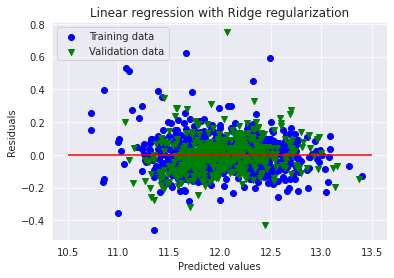

In [61]:
# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c="blue",  label="Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c="green", marker="v", label="Validation data")

plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=10.5, xmax=13.5, color="red")
plt.show()

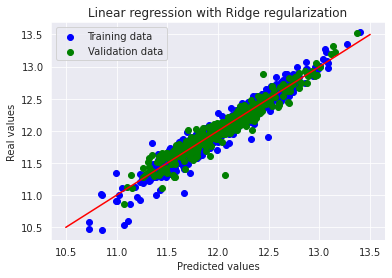

In [62]:
# Plot predictions - Real values
plt.scatter(y_train_rdg, y_train, c="blue", label="Training data")
plt.scatter(y_test_rdg, y_test, c="green", label="Validation data")

plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc="upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c="red")
plt.show()

## LASSO Regression

In [12]:
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, RobustScaler

In [13]:
scaler = StandardScaler()
scaler.fit(df.fillna(0))

StandardScaler()

In [31]:
sel_ = SelectFromModel(Lasso(alpha=0.0005))
sel_.fit(df, df_target)

/home/modules/HousingPrice/venv/lib/python3.7/site-packages/sklearn/feature_selection/_from_model.py:267: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.estimator_.fit(X, y, **fit_params)
/home/modules/HousingPrice/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/home/modules/HousingPrice/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.136e+00, tolerance: 2.328e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solve

SelectFromModel(estimator=Lasso(alpha=0))

In [32]:
# make a list with the selected features and print the outputs
selected_feat = df.columns[(sel_.get_support())]

print('total features: {}'.format((df.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 267
selected features: 264
features with coefficients shrank to zero: 0


In [154]:
selected_feat.tolist()

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'Fence',
 'MiscVal',
 'TotalFlrSFAbvGrd',
 'TotalSF',
 'Spaciousness',
 'TotalBath',
 'TotalPorchSF',
 'MSSubClass_4.1466870313687',
 'MSSubClass_4.875767801446074',
 'MSSubClass_6.622579749822654',
 'MSSubClass_7.202598230398585',
 'MSSubClass_7.903776119514091',
 'MSSubClass_8.646522023750673',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RM',
 'Alley_Pave',
 'LandC

- Quel alpha ?
- Dois je scaler les données ? RobustScaler parait plus approprié